# Assignment 6.1

Name: Bhavin Palan

Date: 06/15/25

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 6.1.

For the Scottish hill `Races` data, a linear model can predict men’s record times from women’s record times.  
http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat


(a)  Show the scatterplot and report the prediction equation. Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.


`Your answer goes here`

In [4]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat"
file_name = "ScotsRaces.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_ScotsRaces = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_ScotsRaces.head())
    print(df_ScotsRaces.columns)

else:
    print("Unable to Download the File")
    

File downloaded successfully.

Sample Output from the File is below: 

               race  distance  climb   timeM   timeW
0        AnTeallach      10.6  1.062   74.68   89.72
1      ArrocharAlps      25.0  2.400  187.32  222.03
2  BaddinsgillRound      16.4  0.650   87.18  102.48
3          BeinnLee      10.2  0.260   41.58   52.52
4        BeinnRatha      12.0  0.240   47.75   58.78
Index(['race', 'distance', 'climb', 'timeM', 'timeW'], dtype='object')


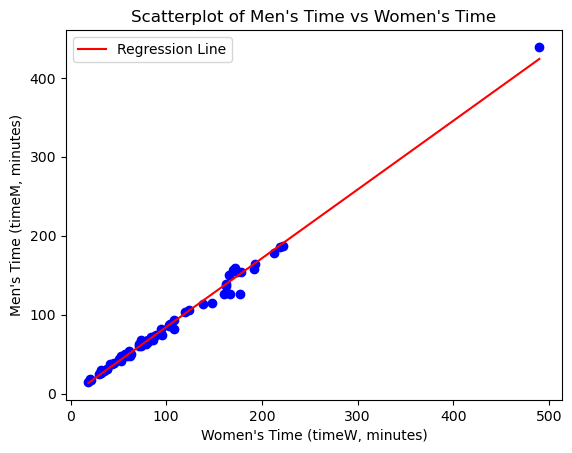

1. Prediction equation: timeM = -2.834 + 0.871 * timeW
2. Predicted men’s time for women's time 490.05 minutes: 423.94 minutes


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# Scatterplot timeM vs timeW
plt.scatter(df_ScotsRaces['timeW'], df_ScotsRaces['timeM'], color='blue')
plt.xlabel("Women's Time (timeW, minutes)")
plt.ylabel("Men's Time (timeM, minutes)")
plt.title("Scatterplot of Men's Time vs Women's Time")

# Fit linear regression model
X = df_ScotsRaces[['timeW']].values 
y = df_ScotsRaces['timeM'].values

model = LinearRegression()
model.fit(X, y)

# Get regression coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Plot regression line
x_line = np.linspace(df_ScotsRaces['timeW'].min(), df_ScotsRaces['timeW'].max(), 100)
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.legend()
plt.show()

# Predict men’s time for timeW = 490.05
new_timeW = 490.05
predicted_timeM = model.predict([[new_timeW]])[0]

print(f"1. Prediction equation: timeM = {intercept:.3f} + {slope:.3f} * timeW")
print(f"2. Predicted men’s time for women's time {new_timeW} minutes: {predicted_timeM:.2f} minutes")


**Summary:** Here the Slope is 0.871 and Intercept is -2.834. Meaning if Women's time is 0, then Men's Time is -ve. This Doesn't Make sense in a real world scenario so in answer c we are making it 0 and then fitting the line accordingly

(b) Find and interpret the correlation.

`Your answer goes here`

In [10]:
# Calculate Pearson correlation coefficient
correlation = df_ScotsRaces['timeW'].corr(df_ScotsRaces['timeM'])
print(f"Correlation between women's time and men's time: {correlation:.3f}")

Correlation between women's time and men's time: 0.996


**Summary:** This shows a strong co-relation between Women and Mens Time with a Consistent Linear Relationship

(c) We could impose the natural constraint that when timeW = 0, then timeM = 0. Fit the model $E(Y_i)=\beta x_i.$ Interpret the estimated slope.

`Your answer goes here`

In [14]:
model_nointercept = LinearRegression(fit_intercept=False)
model_nointercept.fit(X, y)

slope_nointercept = model_nointercept.coef_[0]

print(f"Estimated slope (beta) with no intercept: {slope_nointercept:.3f}")

Estimated slope (beta) with no intercept: 0.852


**Summary:** Here by making intercept 0 we force the line through 0 since 0 Women's time should also mean 0 Men's time. Based on this analysis, Slope is 0.85 meaning Men tends to be 15% faster compare to Women based on this data

## Problem 6.2.

For advanced industrialized nations, the Firearms data file at the text website shows annual homicide rates (per million population) and the number of firearms (per 100 people), with data taken from Wikipedia and [smallarmssurvey.org](smallarmssurvey.org).

(a) Construct a scatterplot and highlight any observations that fall apart from the general trend.

`Your answer goes here`

In [17]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Firearms.dat"
file_name = "Firearms.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_Firearms = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_Firearms.head())
    print(df_Firearms.columns)

else:
    print("Unable to Download the File")

File downloaded successfully.

Sample Output from the File is below: 

    Nation  deaths  firearms
0  Austria     1.8        30
1  Belgium     2.9        17
2   Canada     5.1        31
3  Denmark     2.2        12
4  Finland     2.6        45
Index(['Nation', 'deaths', 'firearms'], dtype='object')


Text(0.5, 1.0, 'Scatterplot of Deaths vs Firearms by Nation')

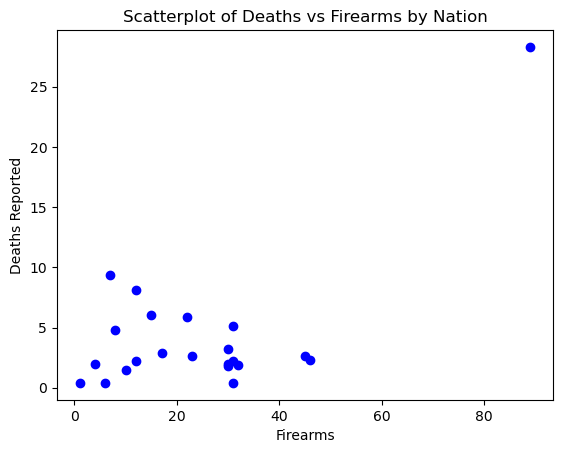

In [19]:
# Scatterplot timeM vs timeW
plt.scatter(df_Firearms['firearms'], df_Firearms['deaths'], color='blue')
plt.xlabel("Firearms")
plt.ylabel("Deaths Reported")
plt.title("Scatterplot of Deaths vs Firearms by Nation")

**Summary:** Here we can see some Positive Co-relation between Firearms and Deaths but it is not perfectly Linear and there is some spread in data.

(b) Find the correlation with and without the outlying observation. Why is it so different in the two cases?

`Your answer goes here`

Here we will identify the Outlier using z-score and Exclude it to Calculate Co-Relation

In [23]:
from scipy.stats import zscore

df_Firearms['z_firearms'] = zscore(df_Firearms['firearms'])
df_Firearms['z_deaths'] = zscore(df_Firearms['deaths'])

# Identify rows where either variable is an outlier - Using 3 since wanted to consider 99.7% data within range
outliers = df_Firearms[(df_Firearms['z_firearms'].abs() > 3) | (df_Firearms['z_deaths'].abs() > 3)]

# Remove these outliers
df_Firearms_wo_outliers = df_Firearms.drop(outliers.index)

# Correlation with and without outliers
corr_with_outlier = df_Firearms['firearms'].corr(df_Firearms['deaths'])
corr_without_outlier = df_Firearms_wo_outliers['firearms'].corr(df_Firearms_wo_outliers['deaths'])

print("Outliers:\n", outliers[['Nation', 'firearms', 'deaths']])
print("Correlation with outliers:", corr_with_outlier)
print("Correlation without outliers:", corr_without_outlier)


Outliers:
    Nation  firearms  deaths
21     US        89    28.3
Correlation with outliers: 0.6343518045675639
Correlation without outliers: -0.17508777564631017


**Summary:** It shows that US is the outlier highly influencing the co-relation between Firearm and Death. Without US, the co-relation is Weak and Negative showing inverse trend. 

(c) Fit the linear regression model with and without the outlying observation, and note how influential an outlier can be on the fit.

`Your answer goes here`

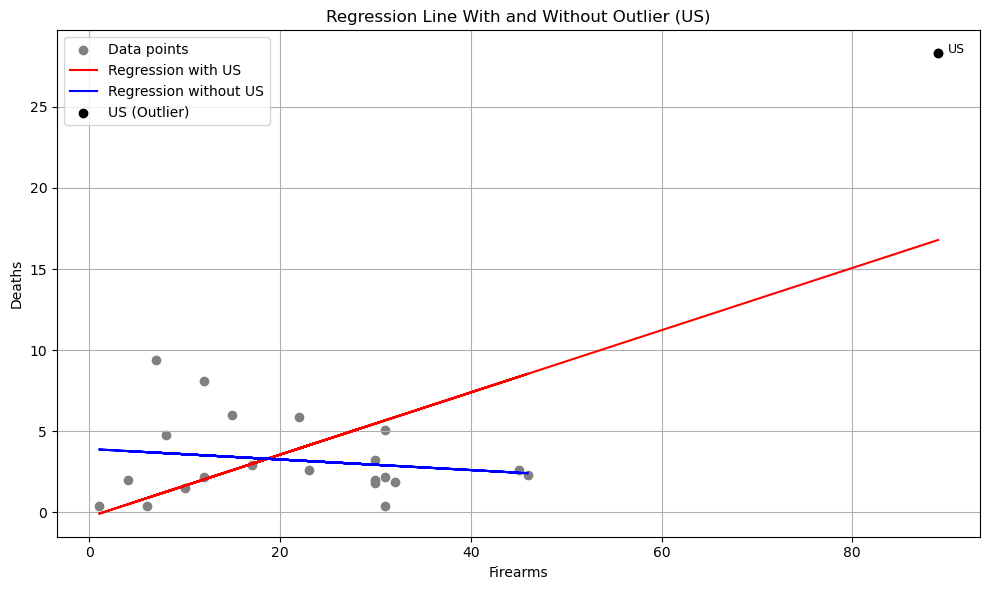

With US: deaths = -0.273 + 0.192 * firearms
Without US: deaths = 3.910 + -0.033 * firearms


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create X and y
X_with_outlier = df_Firearms[['firearms']]
y_with_outlier = df_Firearms['deaths']

# Model with outlier (US included)
model_with_outlier = LinearRegression().fit(X_with_outlier, y_with_outlier)
y_pred_with_outlier = model_with_outlier.predict(X_with_outlier)

# Remove the outlier (US)
df_Firearms_wo_outlier = df_Firearms[df_Firearms['Nation'] != 'US']
X_without_outlier = df_Firearms_wo_outlier[['firearms']]
y_without_outlier = df_Firearms_wo_outlier['deaths']

# Model without outlier
model_without_outlier = LinearRegression().fit(X_without_outlier, y_without_outlier)
y_pred_without_outlier = model_without_outlier.predict(X_without_outlier)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_Firearms['firearms'], df_Firearms['deaths'], color='gray', label='Data points')
plt.plot(df_Firearms['firearms'], y_pred_with_outlier, color='red', label='Regression with US')
plt.plot(df_Firearms_wo_outlier['firearms'], y_pred_without_outlier, color='blue', label='Regression without US')

# Label the US point
us_row = df_Firearms[df_Firearms['Nation'] == 'US']
plt.scatter(us_row['firearms'], us_row['deaths'], color='black', label='US (Outlier)', zorder=5)
plt.text(us_row['firearms'].values[0] + 1, us_row['deaths'].values[0], 'US', fontsize=9)

plt.xlabel("Firearms")
plt.ylabel("Deaths")
plt.title("Regression Line With and Without Outlier (US)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression equations
print("With US: deaths = {:.3f} + {:.3f} * firearms".format(model_with_outlier.intercept_, model_with_outlier.coef_[0]))
print("Without US: deaths = {:.3f} + {:.3f} * firearms".format(model_without_outlier.intercept_, model_without_outlier.coef_[0]))

**Summary:** This highlights how the US influences the Positive Trend of Firearms and Death. It also highlights that after removing the outlier, the relationship is Weak and -ve

## Problem 6.5.

For the `Covid19` data file at the text website:  
http://stat4ds.rwth-aachen.de/data/Covid19.dat 

(a) Construct the two scatterplots shown in Figure 6.3.

`Your answer goes here`

**It looks like question is incomplete. There is no Figure 6.3 in this Notebook or in the Textbook. But I would still create a scatter plot of Days vs cases** 

In [25]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Covid19.dat"
file_name = "Covid19.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_Covid19 = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_Covid19.head())
    print(df_Covid19.columns)

else:
    print("Unable to Download the File")

File downloaded successfully.

Sample Output from the File is below: 

   day  cases
0    1     16
1    2     24
2    3     30
3    4     53
4    5     80
Index(['day', 'cases'], dtype='object')


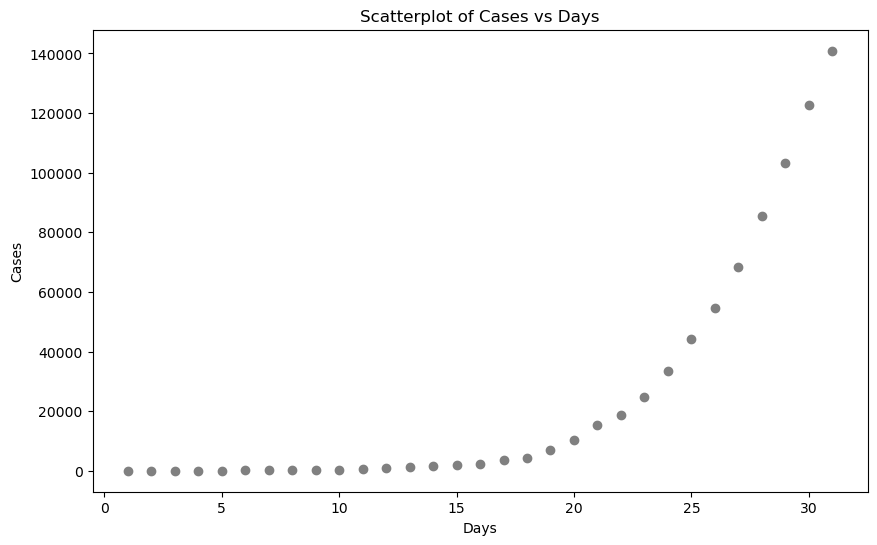

In [27]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_Covid19['day'], df_Covid19['cases'], color='gray', label='Data points')
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title(f'Scatterplot of Cases vs Days')
plt.show()

(b) Find and interpret the correlation between time and (i) cases, (ii) log(cases).

`Your answer goes here`

In [30]:
import pandas as pd
import numpy as np

# Assuming 'time' and 'cases' columns exist - adjust if different
# If columns are named differently, replace here accordingly
time_col = 'day'  # or 'Time' based on actual column name
cases_col = 'cases'  # or 'Cases'

# Check if columns exist and are numeric
if time_col in df_Covid19.columns and cases_col in df_Covid19.columns:
    # Calculate correlation between time and cases
    corr_cases = df_Covid19[time_col].corr(df_Covid19[cases_col])
    
    # Calculate correlation between time and log(cases)
    # Use log(1 + cases) to avoid log(0) issues if zero cases exist
    log_cases = np.log1p(df_Covid19[cases_col])
    corr_log_cases = df_Covid19[time_col].corr(log_cases)
    
    print(f"Correlation between {time_col} and {cases_col}: {corr_cases:.4f}")
    print(f"Correlation between {time_col} and log({cases_col}): {corr_log_cases:.4f}")
    
else:
    print(f"Columns {time_col} and/or {cases_col} not found in data.")


Correlation between day and cases: 0.7937
Correlation between day and log(cases): 0.9970


**Summary:** From above we can see a Positive Co-relation as when day increases, the Cases & log(cases) both tends to Increase. log(cases) is close to 1 which highlights that the case count grows expotentially overtime.

(c)  Fit the linear model for the log-transformed counts and report the prediction equation.$^{29}.$ Explain why the predicted count at day $x+1$ equals the predicted count at day $x$ multiplied by $\text{exp}(\hat\beta_1)=1.36.$

`Your answer goes here`

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math

# Prepare variables
X = df_Covid19['day']       # independent variable (day)
y = np.log(df_Covid19['cases'])  # dependent variable (log of cases)

# Add constant term for intercept
X_const = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X_const).fit()

# Get coefficients
beta_0, beta_1 = model.params

print(f"Prediction equation: log(cases) = {beta_0:.4f} + {beta_1:.4f} * day")

exp_beta1 = math.exp(beta_1)
print(f"""Expected Count Increases by {exp_beta1:.2f} Multiplier""")

Prediction equation: log(cases) = 2.8439 + 0.3088 * day
Expected Count Increases by 1.36 Multiplier


## Problem 6.8.

Refer to the example in Section 6.2.5 of the crime rate in Florida counties.

(a) Explain what it means when we say these data exhibit *Simpson’s paradox*. What could cause this change in the direction of the association between crime rate and education
when we adjust for urbanization?

`Your answer goes here`

**Answer below:** In the Example 6.2.5, Simpson's Paradox highlights that Crime Rate and the Education is -ve co-relation conditionally at each level of Urbanization. But it shows Positive Co-Relation if we ignore Urbanization. 

This means that Urbanization is an important Compounding Variable that has conditional Co-relation in this example.

(b) Using the Florida data file, construct the scatterplot between *x* = education (HS) and *y* = income (Income), for which the correlation is 0.79. If we had data at the individual
level as well as aggregated for a county, sketch a scatterplot to show that at that level the correlation could be much weaker. So, predictions about individuals based on the
behavior of aggregate groups, known as the *ecological fallacy*, can be quite misleading.

`Your answer goes here`

In [38]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Florida.dat"
file_name = "Florida.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_Florida = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_Florida.head())
    print(df_Florida.columns)

else:
    print("Unable to Download the File")

File downloaded successfully.

Sample Output from the File is below: 

     County  Crime  Income    HS  Urban
0   ALACHUA    104    22.1  82.7   73.2
1     BAKER     20    25.8  64.1   21.5
2       BAY     64    24.7  74.7   85.0
3  BRADFORD     50    24.6  65.0   23.2
4   BREVARD     64    30.5  82.3   91.9
Index(['County', 'Crime', 'Income', 'HS', 'Urban'], dtype='object')


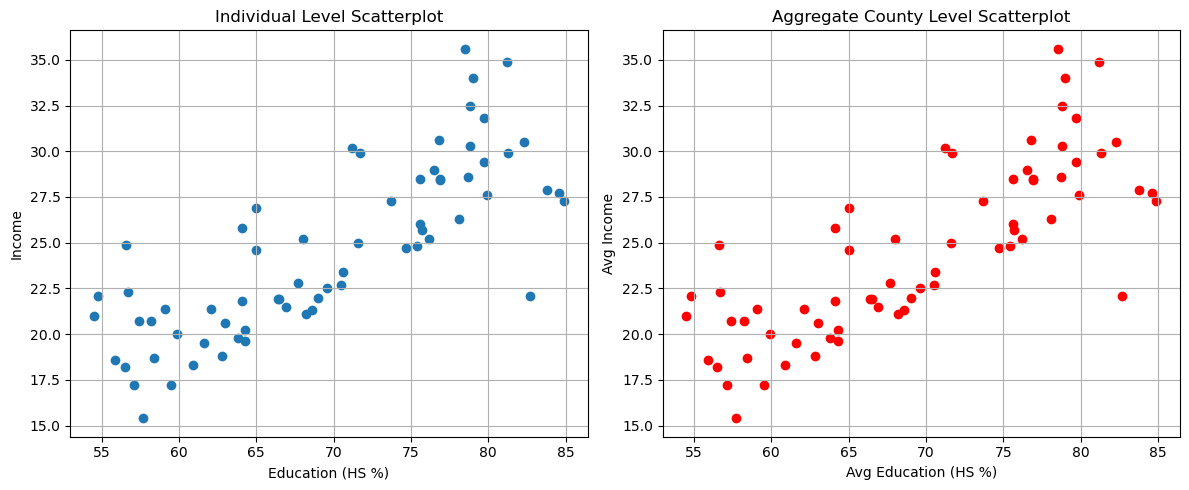

Correlation at individual level: 0.79
Correlation at aggregate (county) level: 0.79


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Scatterplot at individual level
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_Florida['HS'], df_Florida['Income'])
plt.title('Individual Level Scatterplot')
plt.xlabel('Education (HS %)')
plt.ylabel('Income')
plt.grid(True)

# Now aggregate at County level (mean HS and Income per county)
agg_df_Florida = df_Florida.groupby('County').mean().reset_index()

plt.subplot(1, 2, 2)
plt.scatter(agg_df_Florida['HS'], agg_df_Florida['Income'], color='red')
plt.title('Aggregate County Level Scatterplot')
plt.xlabel('Avg Education (HS %)')
plt.ylabel('Avg Income')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate correlations
corr_individual = df_Florida['HS'].corr(df_Florida['Income'])
corr_aggregate = agg_df_Florida['HS'].corr(agg_df_Florida['Income'])

print(f'Correlation at individual level: {corr_individual:.2f}')
print(f'Correlation at aggregate (county) level: {corr_aggregate:.2f}')


**Summary:** In this example, both cases have same 0.79 Co-relation which means that linear positive relation is maintained well in both cases. Since it is same for both, it is not illustrating Ecological Fallacy.

(c) Refer to (b), in which *x* falls between 54.5 and 84.9. Is it sensible to use the least squares line to predict a county’s median income if *x* = 0? Sketch a hypothetical true relationship between *x* and *E(Y)* to show the danger of *extrapolation*, using a fitted line to predict *E(Y)* far from the observed *x* values.

`Your answer goes here`

**Summary:** 
1. It is not sensible to use least square lines for x = 0 because here x is between 54.5 to 84.9. It should be used only when data is within that Range.
2. 

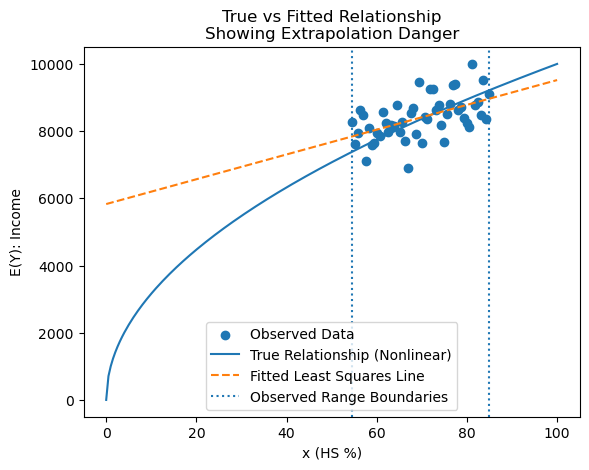

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Define a hypothetical true relationship (nonlinear)
def true_relationship(x):
    return 1000 * np.sqrt(x)  # Income grows with sqrt of HS %

# Observed data range
x_obs = np.linspace(54.5, 84.9, 50)
y_true_obs = true_relationship(x_obs)
y_obs = y_true_obs + np.random.normal(scale=500, size=x_obs.shape)  # add noise

# Fit a least squares line on the observed data
slope, intercept = np.polyfit(x_obs, y_obs, 1)

# Full range for plotting including extrapolation region
x_full = np.linspace(0, 100, 200)
y_true_full = true_relationship(x_full)
y_fit_full = slope * x_full + intercept

# Plotting
plt.figure()
plt.scatter(x_obs, y_obs, label='Observed Data')
plt.plot(x_full, y_true_full, label='True Relationship (Nonlinear)')
plt.plot(x_full, y_fit_full, linestyle='--', label='Fitted Least Squares Line')
plt.axvline(54.5, linestyle=':', label='Observed Range Boundaries')
plt.axvline(84.9, linestyle=':')
plt.xlabel('x (HS %)')
plt.ylabel('E(Y): Income')
plt.title('True vs Fitted Relationship\nShowing Extrapolation Danger')
plt.legend()
plt.show()

## This code was generated with help of ChatGPT to visualize the Hypothetical True Relationship and for better understanding it.

## Problem 6.10.

The `Students` data file shows responses on variables summarized in Exercise 1.2.

(a) Fit the linear model using *hsgpa* = high school GPA, *tv* = weekly hours watching TV, and *sport* = weekly hours participating in sports as predictors of *cogpa* = college GPA. Report the prediction equation. What do the *P*-values suggest?

`Your answer goes here`

In [42]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Students.dat"
file_name = "Students.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_Students = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_Students.head())
    print(df_Students.columns)

else:
    print("Unable to Download the File")

File downloaded successfully.

Sample Output from the File is below: 

   subject  gender  age  hsgpa  cogpa  dhome  dres    tv  sport  news  aids  \
0        1       0   32    2.2    3.5      0   5.0   3.0      5     0     0   
1        2       1   23    2.1    3.5   1200   0.3  15.0      7     5     6   
2        3       1   27    3.3    3.0   1300   1.5   0.0      4     3     0   
3        4       1   35    3.5    3.2   1500   8.0   5.0      5     6     3   
4        5       0   23    3.1    3.5   1600  10.0   6.0      6     3     0   

   veg  affil  ideol  relig  abor  affirm  life  
0    0      2      6      2     0       0     1  
1    1      1      2      1     1       1     3  
2    1      1      2      2     1       1     3  
3    0      3      4      1     1       1     2  
4    0      3      1      0     1       0     2  
Index(['subject', 'gender', 'age', 'hsgpa', 'cogpa', 'dhome', 'dres', 'tv',
       'sport', 'news', 'aids', 'veg', 'affil', 'ideol', 'relig', 'abor',
    

In [46]:
!pip install pingouin --quiet

In [50]:
import pingouin as pg

results = pg.linear_regression(df_Students[['hsgpa', 'tv', 'sport']], df_Students['cogpa'])
print(results)


       names      coef        se         T          pval        r2    adj_r2  \
0  Intercept  2.815427  0.367788  7.655034  2.862880e-10  0.104518  0.056546   
1      hsgpa  0.208804  0.101290  2.061441  4.391478e-02  0.104518  0.056546   
2         tv  0.003336  0.006868  0.485694  6.290793e-01  0.104518  0.056546   
3      sport -0.014066  0.011599 -1.212681  2.303431e-01  0.104518  0.056546   

   CI[2.5%]  CI[97.5%]  
0  2.078660   3.552195  
1  0.005895   0.411713  
2 -0.010422   0.017094  
3 -0.037301   0.009169  


**Summary:**

1. Prediction Equation = 2.815 + 0.208*hsgpa + 0.0033*tv - 0.0140*sports
2. P-Value of hsgpa = 0.0439 and tv = 0.629 & sports = 0.230. Since P-Value of hsgpa < 0.05 meaning hsgpa is statistically significant.

(b)  Summarize the estimated effect of *hsgpa.*

`Your answer goes here`

**Summary:**

1. Coefficient of hsgpa = 0.208 with P-Value = 0.0439 and 95% CI = 0.0058 to 0.4117
2. High School CGPA is a positive and statistically significant of College GPA. 

(c) Report and interpret $R^2$, adjusted $R^2$, and the multiple correlation.

`Your answer goes here`

**Summary:**

1. As seen in the output of a), R2 = 0.1045 and adjusted R2 = 0.0565
2. R2 of 0.1045 means that this 3 variables can explain 10.45% of the variation in College GPA. Remaining ~89% needs to be explained from other variables that are not considered in this. This highlights that this 3 Variables explains only a small portion of Variation in College GPA.
3. Adjusted R2 < R2 meaning TV & Sports doesnt contribute much towards explaining the variable.
4. Multiple Co-relation = SQRT(R2) = 0.3233 meaning weak linear relationship between dependent variables & Indepenent in this case. Value close to 1 shows the Strong Relationship.

## Problem 6.11.

Refer to the model fitted in the previous exercise to predict college GPA.

(a) Test $H_0:\beta_1 = \beta_2 = \beta_3 =0.$ Report the *P*-value and interpret.


`Your answer goes here`

In [51]:
import statsmodels.api as sm

# Define predictors and response
X = df_Students[['hsgpa', 'tv', 'sport']]
y = df_Students['cogpa']

# Add intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print full summary
print(model.summary())

# OR get just the F-test p-value
print("F-test p-value:", model.f_pvalue)

                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.101
Time:                        20:52:22   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8154      0.368      7.655      0.0

**Summary:** Here P-Value = 0.1006 which is greater than 0.05 so we fail to reject Null Hypothesis 

(b) Show how to conduct a significance test about the individual effect of hsgpa, adjusting for tv and sport, using $\alpha = 0.05$. Interpret.

`Your answer goes here`

**Summary:**

1.  Null Hypothesis : High School GPA has no effect on College GPA
2.  Alternative Hypothesis : High School GPA has effect on College GPA

3. We already see that p-value is 0.044 which is less than 0.05 so we are able to reject Null Hypothesis.

This means that High School GPA has effect on College GPA.

(c)  Is the effect in (b) significant at the $\alpha = 0.05$ level if we use the Bonferroni approach to test the family of three individual effects? Explain.

`Your answer goes here`

In [53]:
# Extract p-values for predictors only (exclude intercept)
pvals = model.pvalues.drop('const')

# Bonferroni correction
alpha = 0.05
alpha_bonf = alpha / 3

# Check significance after Bonferroni correction
significant_bonf = pvals < alpha_bonf

print(f"\nBonferroni corrected alpha: {alpha_bonf:.4f}")
print("Significant after Bonferroni correction?")
print(significant_bonf)

# For convenience, print results in a table
results_df = pd.DataFrame({
    'p-value': pvals,
    'Bonferroni alpha': alpha_bonf,
    'Significant': significant_bonf
})

print("\nSummary:")
print(results_df)


Bonferroni corrected alpha: 0.0167
Significant after Bonferroni correction?
hsgpa    False
tv       False
sport    False
dtype: bool

Summary:
        p-value  Bonferroni alpha  Significant
hsgpa  0.043915          0.016667        False
tv     0.629079          0.016667        False
sport  0.230343          0.016667        False


**Summary:**

From above we can view that using Bonferroni Correlation, effect of High School GPA is not Statistically Significant on College GPA which is different that we have originally tested.

(d) Are the effects of *tv* and *sport* significant? Propose an alternative model.

`Your answer goes here`

**Summary:**

- P-Value for Both TV (0.629) and SPORTS(0.230) are > 0.05 so they are not statistically Significant for College GPA.
- Since they are not significant, in alternative Model, we should just consider HGPA for CGPA.

## Problem 6.12.

For the `UN` data file at the book’s website (see Exercise 1.24), construct a multiple regression model predicting Internet using all the other variables. Use the concept of multicollinearity to explain why adjusted $R^2$ is not dramatically greater than when GDP is the sole predictor. Compare the estimated GDP effect in the bivariate model and the multiple regression model and explain why it is so much weaker in the multiple regression model.

`Your answer goes here`

In [54]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/UN.dat"
file_name = "UN.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_UN = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_UN.head())
    print(df_UN.columns)

else:
    print("Unable to Download the File")

File downloaded successfully.

Sample Output from the File is below: 

      Nation   GDP   HDI   GII  Fertility   CO2  Homicide  Prison  Internet
0    Algeria  12.8  0.72  0.42        2.8   3.2       0.8     162        17
1  Argentina  14.7  0.81  0.38        2.2   4.7       5.5     147        60
2  Australia  42.3  0.93  0.11        1.9  16.5       1.1     130        83
3    Austria  43.1  0.88  0.06        1.4   7.8       0.8      98        81
4    Belgium  39.5  0.88  0.07        1.8   8.8       1.8     108        82
Index(['Nation', 'GDP', 'HDI', 'GII', 'Fertility', 'CO2', 'Homicide', 'Prison',
       'Internet'],
      dtype='object')


In [56]:
import pandas as pd
import statsmodels.api as sm

# Suppose df is your dataframe with the columns specified

# Define predictors (exclude Nation)
X_all = df_UN[['GDP', 'HDI', 'GII', 'Fertility', 'CO2', 'Homicide', 'Prison']]
y = df_UN['Internet']

# Add intercept
X_all = sm.add_constant(X_all)

# Fit multiple regression model
model_all = sm.OLS(y, X_all).fit()

print("Multiple regression summary:")
print(model_all.summary())

# Fit simple bivariate regression with GDP only
X_gdp = sm.add_constant(df_UN['GDP'])
model_gdp = sm.OLS(y, X_gdp).fit()

print("\nBivariate regression with GDP only:")
print(model_gdp.summary())

# Compare the GDP coefficient in both models
print("\nGDP coefficient (bivariate):", model_gdp.params['GDP'])
print("GDP coefficient (multiple regression):", model_all.params['GDP'])


Multiple regression summary:
                            OLS Regression Results                            
Dep. Variable:               Internet   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     27.04
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           3.95e-12
Time:                        21:07:51   Log-Likelihood:                -154.04
No. Observations:                  42   AIC:                             324.1
Df Residuals:                      34   BIC:                             338.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1583  

**Summary:**

1. Adjusted R2 has only 0.05 change between bi-variate and multiple regression. It reflects multicollinearity , meaning the additional variables not adding much value to explain Increase in Internet access which is explained by GDP Only.
2. We can see that GDP Coefficient changed over from 1.41 to 0.44 from Bivariate to Multiple Regression. This is because Bivariate GDP explains Direct and Shared effect while Multiple regression explains unique direct effect only. So GDP Coefficient Shrink

## Problem 7.1.

For the `Houses` data file described in Section 7.1.3, consider $Y$ = selling price, $x_1$ = tax bill (in dollars), and $x_2$ = whether the house is new.

(a) Form the scatterplot of $y$ and $x_1$. Does the normal GLM structure of constant variability in $y$ seem approproate? If not, how does it seem to be violated?

`Your answer goes here`

In [57]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Houses.dat"
file_name = "Houses.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_Houses = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_Houses.head())
    print(df_Houses.columns)

else:
    print("Unable to Download the File")

File downloaded successfully.

Sample Output from the File is below: 

   case   price  size  new  taxes  bedrooms  baths
0     1  419.85  2048    0   3104         4      2
1     2  219.75   912    0   1173         2      1
2     3  356.55  1654    0   3076         4      2
3     4  300.00  2068    0   1608         3      2
4     5  239.85  1477    0   1454         3      3
Index(['case', 'price', 'size', 'new', 'taxes', 'bedrooms', 'baths'], dtype='object')


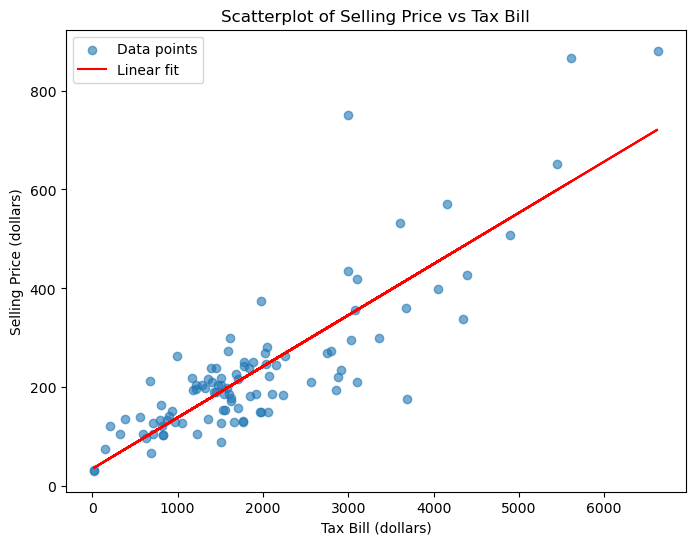

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# --- Step 1: Scatterplot of price vs taxes ---
plt.figure(figsize=(8, 6))
plt.scatter(df_Houses['taxes'], df_Houses['price'], alpha=0.6, label='Data points')
plt.xlabel('Tax Bill (dollars)')
plt.ylabel('Selling Price (dollars)')
plt.title('Scatterplot of Selling Price vs Tax Bill')

# --- Step 2: Fit and plot a linear regression line ---
X = df_Houses['taxes'].values.reshape(-1, 1)
y = df_Houses['price'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(df_Houses['taxes'], y_pred, color='red', label='Linear fit')

plt.legend()
plt.show()




**Summary:** Since the Spread of Points around the Red Line Widens as the Taxes Increases, it violates the assumption of Constant Variability - homoscedasticity

(b) Using the identity link function, fit the (i) normal GLM, (ii) gamma GLM. For each model, interpret the effect of $x_2$.

`Your answer goes here`

In [60]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# --- (i) Normal GLM with identity link ---
model_normal = smf.glm(formula='price ~ new',
                       data=df_Houses,
                       family=sm.families.Gaussian(sm.families.links.identity()))
result_normal = model_normal.fit()
print("Normal GLM (Identity link):")
print(result_normal.summary())

# --- (ii) Gamma GLM with identity link ---
model_gamma = smf.glm(formula='price ~ new',
                      data=df_Houses,
                      family=sm.families.Gamma(sm.families.links.identity()))
result_gamma = model_gamma.fit()
print("\nGamma GLM (Identity link):")
print(result_gamma.summary())


Normal GLM (Identity link):
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          18087.
Method:                          IRLS   Log-Likelihood:                -631.03
Date:                Sun, 15 Jun 2025   Deviance:                   1.7725e+06
Time:                        21:34:57   Pearson chi2:                 1.77e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2465
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    207.8511   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


**Summary:** 

1. In the Normal GLM with Identify Link, We can see the Coefficient of New = 228.59. P-Value is < 0.05 meaning it is statistically Significant. Also the Confidence Interval is 144.351 to 312.838 . All this Indicates that the New House tends to be expensive compare to Old Houses.

2. In Gamma GLM, We can see the Coefficient of New = 228.59 with Standard Error 76.69 . P-Value is still <0.05 meaning it is statistically significant but less compare to Normal GLM. Here the Confidence Interval is 78.28 to 378.91 which is quiet widen range compare to Normal

(c) For each model, describe how the estimated variability in selling prices varies as the mean selling price varies from 100 thousand to 500 thousand dollars.

`Your answer goes here`

**Summary:** 

Normal GLM assumes the Constant Variance (homoscedasticity) which means that selling price from 100 thousand to 500 thousand dollars have no impact on the Variability

Gamma GLM assumes the Variance increases with the square of the mean. So higher the home prices, the higher the variability.

(d) Which model is preferred according to AIC?

`Your answer goes here`

**Summary:**

Log-Likelihood for Gamma is Less than Normal so as per AIC, it is preferred.

## Problem 7.5.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the original observation.

(a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

`Your answer goes here`

In [61]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Sheep.dat"
file_name = "Sheep.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_Sheep = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_Sheep.head())
    print(df_Sheep.columns)

else:
    print("Unable to Download the File")

File downloaded successfully.

Sample Output from the File is below: 

   sheep  weight  survival
0      1    20.8         0
1      2    23.0         1
2      3    28.0         1
3      4    27.5         1
4      5    26.0         0
Index(['sheep', 'weight', 'survival'], dtype='object')


In [62]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assume df is your DataFrame with columns: 'sheep', 'weight', 'survival'

# Fit logistic regression: survival ~ weight
model = smf.glm(formula='survival ~ weight', data=df_Sheep, family=sm.families.Binomial()).fit()

# Print the summary
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survival   No. Observations:                 1359
Model:                            GLM   Df Residuals:                     1357
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -645.22
Date:                Sun, 15 Jun 2025   Deviance:                       1290.4
Time:                        21:49:16   Pearson chi2:                 1.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1294
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0298      0.251     -8.103      0.0

**Summary:**

1. P-Value is < 0.05 so it is Statistically Significant
2. Coefficient of Weight is +ve meaning as the weight increases, the chances of Survival Increases

This highlights that there is a strong evidence when the Sheeps Survival Probability increases as the Weight Increases.

(b)  For what weight values do the sheep have more than a 50% chance of survival?

`Your answer goes here`

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Assume df is your original DataFrame with 'weight' and 'survival'
# Fit the logistic regression model
model = smf.glm(formula='survival ~ weight', data=df_Sheep, family=sm.families.Binomial()).fit()

# Extract coefficients
intercept = model.params['Intercept']
slope = model.params['weight']

# Calculate the weight where survival probability = 0.5
threshold_weight = -intercept / slope
print(f"Weight where survival probability = 0.5: {threshold_weight:.2f} kg")


Weight where survival probability = 0.5: 11.57 kg


## Problem 7.9.

The `SoreThroat` data file at the book’s website contains data from from a study$^{23}$ about *Y* = whether a patient having surgery had a sore throat on waking (1 = yes, 0 = no) as a function of *D* = duration of the surgery (in minutes) and *T* = type of device used to secure the airway (1 = tracheal tube, 0 = laryngeal mask airway).

(a) Fit a GLM using both explanatory variables as main effects. Interpret effects.

`Your answer goes here`

In [66]:
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/SoreThroat.dat"
file_name = "SoreThroat.dat"

## Function to Download the File from the URL and Preview the Data
def download_file(file_url,file_name):
    try:
        response = requests.get(file_url)
        response.raise_for_status()

        ## Write to the File locally
        with open(file_name, "wb") as f:
            f.write(response.content)
        
        ## Verify if the file got downloaded successfully or not
        if file_name in os.listdir('.'):
            print("File downloaded successfully.\n")
            
            ## Read the file with multiple space delimiter & Print the Sample data
            df = pd.read_csv(file_name, sep=r'\s+', engine='python')
            return "Success", df
        else:
            print("File not found.")
            df = pd.DataFrame()
            return "Error", df
        
    except requests.HTTPError as e:
        print("HTTP error occurred:", e)
        df = pd.DataFrame()
        return "Error", df
        

## Call the Download Function with File URL and File Name to be stored Locally
msg,df_SoreThroat = download_file(data_url,file_name)
if msg == "Success":
    print("Sample Output from the File is below: \n")
    print(df_SoreThroat.head())
    print(df_SoreThroat.columns)

else:
    print("Unable to Download the File")

File downloaded successfully.

Sample Output from the File is below: 

    D  T  Y
0  45  0  0
1  15  0  0
2  40  0  1
3  83  1  1
4  90  1  1
Index(['D', 'T', 'Y'], dtype='object')


In [67]:
import pandas as pd
import statsmodels.api as sm


# Add a constant for the intercept
X = sm.add_constant(df_SoreThroat[['D', 'T']])
y = df_SoreThroat['Y']

# Fit the binomial GLM
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Print summary
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.069
Date:                Sun, 15 Jun 2025   Deviance:                       30.138
Time:                        21:55:50   Pearson chi2:                     37.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4173      1.095     -1.295      0.1

**Summary:**

1. With a +ve Coefficient and P Value 0.009 for D, shows that as the Duration Increases, it Raises the risk for Soar Throat.
2. With a -ve Coefficient and P Value 0.072 for T, Device Effects are uncertain with weak evidence

(b) Fit a GLM permitting interaction between the explanatory variables. Interpret the effect of *D* at each category of *T*.

`Your answer goes here`

In [69]:
import statsmodels.api as sm

# Create interaction term
df_SoreThroat['D_T'] = df_SoreThroat['D'] * df_SoreThroat['T']

# Prepare model predictors including interaction
X_interact = sm.add_constant(df_SoreThroat[['D', 'T', 'D_T']])
y = df_SoreThroat['Y']

# Fit the GLM with interaction
model_interact = sm.GLM(y, X_interact, family=sm.families.Binomial()).fit()

print(model_interact.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.161
Date:                Sun, 15 Jun 2025   Deviance:                       28.321
Time:                        22:00:46   Pearson chi2:                     28.6
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0498      1.469      0.034      0.9

**Summary:**

No clear evidence of Duration effect for mask (T=0).

Interaction is not statistically significant.

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{23}$ Described in “Binary Data” by D. Collett, *Encyclopedia of Biostatistics*, 2nd ed. (Wiley, 2005), pp. 439–446.

$^{29}$ Some lack of fit the last few days reflects the impact of increasing “social distancing.”